In [60]:
from ergochemics.mapping import get_reaction_center
from rdkit import Chem
from ergochemics.draw import draw_reaction, draw_molecule
from ergochemics.standardize import standardize_smiles
from ergochemics.mapping import operator_map_reaction
from IPython.display import SVG
import numpy as np
import polars as pl

def get_lhs_block_rc(am_smarts: str) -> list[int]:
    return get_reaction_center(am_smarts, mode="combined")[0]

In [3]:
study = "bottle25" # test

In [4]:
krs = pl.read_parquet("/home/stef/bottle/artifacts/known/known_reactions.parquet")
krs.head()

id,smarts,enzymes,reverse,db_ids
str,str,list[str],str,list[str]
"""e908a824c912d1e39c46de92d1f738…","""**.NC(CCC(=O)NC(CS)C(=O)NCC(=O…","[""P10649"", ""P50472"", … ""Q08863""]","""3bbe8e6dca0da1c745e7678c8efebe…","[""RHEA:16438""]"
"""d86d99a8143d3be8fc861a5de5e625…","""*.*.*.*.*.*.*.*.*.*.CC(C)(COP(…","[""A0A0C6E0I7"", ""A0A0C6DWS6"", … ""Q0UK50""]","""e99fb0b75e799eba72aee21c1d04ee…","[""RHEA:51350""]"
"""2972b2db66715ba6f3d6aeaf07f31b…","""*.*.*.*.*.*.*.*.*NC(COP(=O)(O)…","[""G0REX6"", ""A0A482N9V7"", ""P0DO30""]","""5a7fffef224c65b7cd431ddc668eb2…","[""RHEA:64546""]"
"""572e4a84a946af07c9ab6fd1c0347b…","""*.*.*.*.*.*.*.*.*OP(=O)(O)OCC(…","[""A5UNX8"", ""Q57952"", … ""Q9V2B0""]","""c4c936d8d985a457a128601b8d2769…","[""RHEA:64377""]"
"""dfe7fc761de3c213bf2b18fae4f8a5…","""*.*.*.*.*.*.*.*.CC(C)CCCC(C)CC…","[""A5UNX8"", ""Q57952"", … ""Q9V2B0""]","""2e026380a550baa6b343604e6f5500…","[""RHEA:64369""]"


In [5]:
prs = pl.read_parquet(
    f"/home/stef/quest_data/bottle/results/{study}/predicted_reactions.parquet"
)
prs.head()

id,smarts,am_smarts,dxgb_label,rxn_sims,analogue_ids,rules
str,str,str,i32,list[f32],list[str],list[str]
"""Rf69ed2c3bad59b65f6f324fd36fb6…","""C[S+](CCC(N)C(=O)O)CC1OC(n2cnc…","""[CH3:1][S+:2]([CH2:3][CH2:4][C…",1,"[0.775672, 0.681005, … 0.652791]","[""1b0b2d567845cf2501ecca594b3ad73eee3861c7"", ""8e5206f209407d73ea31658451f5ffbd3df3202f"", … ""92ebcf5c9a1e75af5653ea48d89a6b14c7775112""]","[""mechinferred_dt_13_rules:1623""]"
"""Rc4541a603abeff0f750bc5f87a3a4…","""CC(CC(=O)O)C(=O)C(=O)O>>CC(C)C…","""[CH3:1][CH:2]([CH2:3][C:4](=[O…",1,"[0.466667, 0.466667, … 0.466667]","[""bb665ed7295cb9ecfc8920e5ccdca8364accbf87"", ""9c93783d22cdb98f5ca6134a9f20dadf32d07221"", … ""110f81a3d56023cd40721ba8582d2f7e3daccb64""]","[""mechinferred_dt_13_rules:3604""]"
"""Ra13283a4c98a0017d01d5b73a8eaa…","""CC(C)C(=O)C(=O)O>>CC1(C)C(=O)C…","""[CH3:1][CH:2]([CH3:3])[C:6](=[…",1,"[0.316228, 0.316228]","[""b5d9bdaa57b5aa799ea99d09b51ccbdb72fdb4fe"", ""b5d9bdaa57b5aa799ea99d09b51ccbdb72fdb4fe""]","[""mechinferred_dt_04_rules:4453""]"
"""Rc7f0cf64fcb6a67f1a319ed5124d3…","""O.CC1(C)C(=O)C1=O>>CC(C)(C=O)C…","""[OH2:8].[CH3:1][C:2]1([CH3:3])…",0,"[0.447214, 0.447214]","[""361dbf24883ee250caa57153b2b950560e464bbb"", ""361dbf24883ee250caa57153b2b950560e464bbb""]","[""mechinferred_dt_04_rules:9227""]"
"""R6dac6e1290d0ab683d2f07e26de84…","""CC(C)(C=O)C(=O)O.NC(=O)C1=CN(C…","""[CH3:1][C:2]([CH3:3])([CH:4]=[…",1,"[0.921053, 0.921053, … 0.857215]","[""f0c782f3f155879a265726490d27099e40d2ea65"", ""f0c782f3f155879a265726490d27099e40d2ea65"", … ""c9558d540f22683412fd5ee870dc1522c697b9bd""]","[""mechinformed_rules:351""]"


In [6]:
paths = pl.read_parquet(
    f"/home/stef/quest_data/bottle/results/{study}/found_paths.parquet"
)
paths.head()

id,starters,targets,reactions,dg_opt,dg_err,starter_ids,target_ids,mdf,mean_max_rxn_sim,mean_mean_rxn_sim,min_max_rxn_sim,min_mean_rxn_sim,feasibility_frac
str,list[str],list[str],list[str],list[f32],list[f32],list[str],list[str],f32,f32,f32,f32,f32,f32
"""Pfd4b5342ca2370367dad058c61477…","[""ketoglutarate""]","[""3hpa""]","[""Rf69ed2c3bad59b65f6f324fd36fb644c85c8bd21e41954e7ba875610f34aa5f8"", ""Rc4541a603abeff0f750bc5f87a3a4bb4d4bed21b45a9e7c31b8151f99fe6b4de"", … ""R6dac6e1290d0ab683d2f07e26de8489c0360f3b54c83a31b08a60a69bbc99c7d""]",null,null,"[""Ce264bf1bbd482e436995855afdf2170ce7229f1d""]","[""Ca44a84be6f833fe631009a55d05e4807de958fe0""]",null,0.585366,0.555031,0.316228,0.316228,0.8
"""P83941f3ecf2f21f3a835cf814bf24…","[""ketoglutarate""]","[""3hpa""]","[""Rf69ed2c3bad59b65f6f324fd36fb644c85c8bd21e41954e7ba875610f34aa5f8"", ""Rc4541a603abeff0f750bc5f87a3a4bb4d4bed21b45a9e7c31b8151f99fe6b4de"", … ""R78e8cb7b0c1c6ff56c0f4cc1d0155418598562c82c6a159b0eb4798054aefcfb""]",null,null,"[""Ce264bf1bbd482e436995855afdf2170ce7229f1d""]","[""Ca44a84be6f833fe631009a55d05e4807de958fe0""]",null,0.501156,0.478224,0.316228,0.316228,0.6
"""P7fc528c58b89f6dfdd5615cf945a1…","[""ketoglutarate""]","[""dmhb""]","[""Rf69ed2c3bad59b65f6f324fd36fb644c85c8bd21e41954e7ba875610f34aa5f8"", ""Rc4541a603abeff0f750bc5f87a3a4bb4d4bed21b45a9e7c31b8151f99fe6b4de"", … ""R3258aef59dfd631844d137779f54c4c2bcbde79355c73cb6a3ab9de43a87707d""]",null,null,"[""Ce264bf1bbd482e436995855afdf2170ce7229f1d""]","[""Cc2274a1b151121868789bd03eb37b9c4065ef3d1""]",null,0.799637,0.771741,0.466667,0.466667,0.6
"""P897045fb6ecc75d636e0fbd64b2f8…","[""ketoglutarate""]","[""3hpa""]","[""Ra13002f8cca9d2907a31543ec661e22ad1e168f050a9b158c1a597575aca4e01"", ""Re0d2372881104d93733f68ede539ecc49cf2ef4706112b0279a886a56d550bdc"", … ""R6dac6e1290d0ab683d2f07e26de8489c0360f3b54c83a31b08a60a69bbc99c7d""]",null,null,"[""Ce264bf1bbd482e436995855afdf2170ce7229f1d""]","[""Ca44a84be6f833fe631009a55d05e4807de958fe0""]",null,0.61911,0.601089,0.316228,0.316228,0.8
"""Pa17f2ba53edb5a410f9be56e85222…","[""ketoglutarate""]","[""3hpa""]","[""Ra13002f8cca9d2907a31543ec661e22ad1e168f050a9b158c1a597575aca4e01"", ""Re0d2372881104d93733f68ede539ecc49cf2ef4706112b0279a886a56d550bdc"", … ""R78e8cb7b0c1c6ff56c0f4cc1d0155418598562c82c6a159b0eb4798054aefcfb""]",null,null,"[""Ce264bf1bbd482e436995855afdf2170ce7229f1d""]","[""Ca44a84be6f833fe631009a55d05e4807de958fe0""]",null,0.534899,0.524282,0.316228,0.316228,0.6


Reaction 1: R8867459e4201138c2d6ff7989ea3f1b352f599fb4f9035702a8dd66abeb5984e, Max sim: 1.0


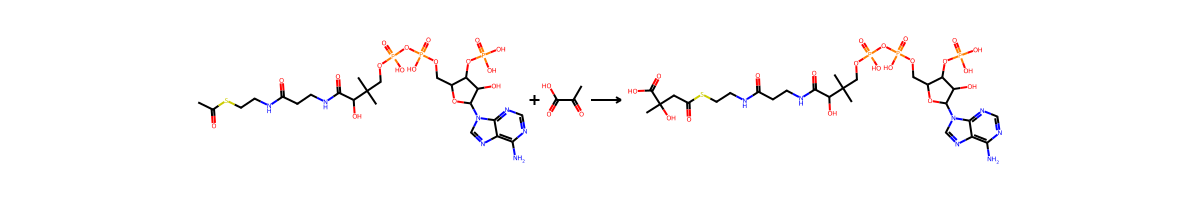

Reaction 2: Rd29576fcff659fb0791106671c246753c21a555237b64a22e1dd347bfbae0d7c, Max sim: 1.0


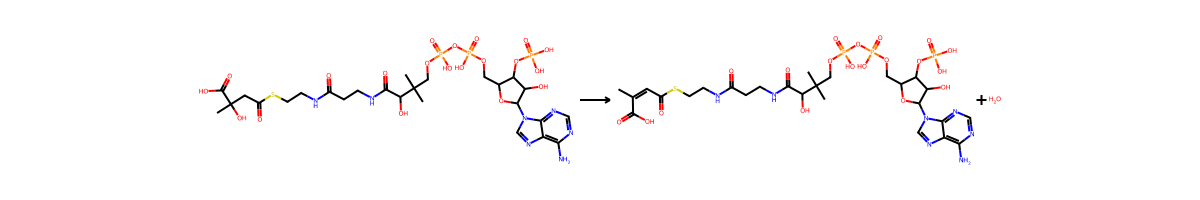

Reaction 3: Rb2e87d63a7b89e4967d8980454761ffe22c9a06e5d955494b81619937cde476e, Max sim: 0.772926926612854


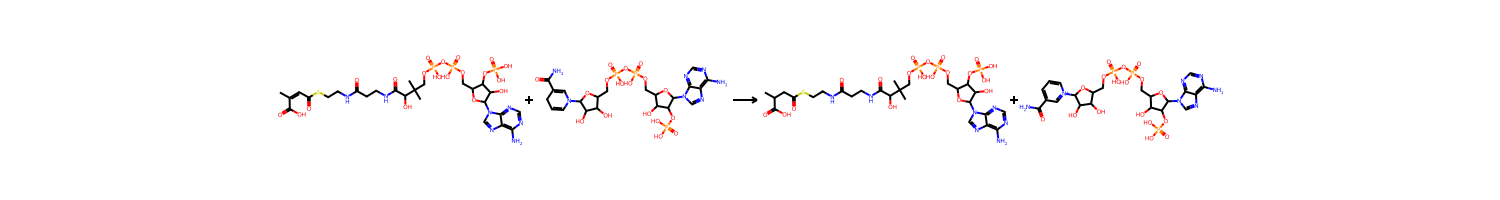

Reaction 4: Rc20e20166a08e82f66e48b57ac011293f68b0edec9cdd32b3df0fd29a7672c2d, Max sim: 0.6880624890327454


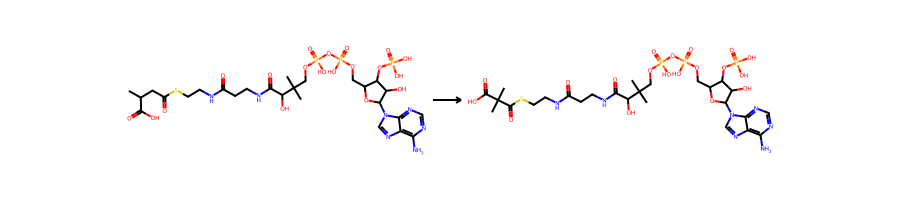

Reaction 5: Rbe75dabb6cd717370c8d27a731caa6e87968e34358e1894cc82711b9f1299f9a, Max sim: 0.8000442981719971


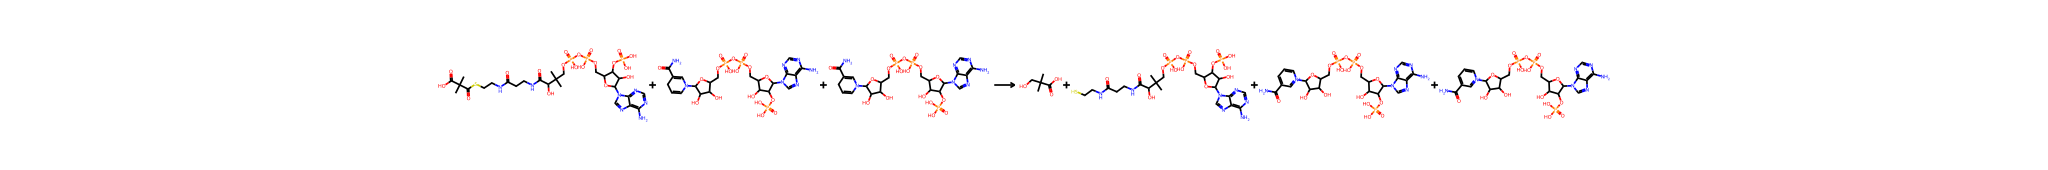

In [94]:
pid = 'P80a2b1'
rids = paths.filter(pl.col("id").str.starts_with(pid))["reactions"].to_list()[0]
path = prs.filter(pl.col("id").is_in(rids)).sort(
    pl.col("id").replace({id: idx for idx, id in enumerate(rids)}),
).with_columns(
    pl.col("rxn_sims").list.max().alias("max_sim")
)
for i, row in enumerate(path.iter_rows(named=True)):
    print(f"Reaction {i+1}: {row['id']}, Max sim: {row['max_sim']}")
    display(
        SVG(
            draw_reaction(row['smarts'])
        )
    )

Reaction 1
  Analogue: 5582845919356f447668dd0ea4647fbddf01b7ac, sim: 1.0
shape: (4,)
Series: '' [str]
[
	"Q3J5L6"
	"A9WGE2"
	"S5N020"
	"A9WC35"
]
shape: (2,)
Series: '' [str]
[
	"RHEA:22614"
	"RHEA:38277"
]


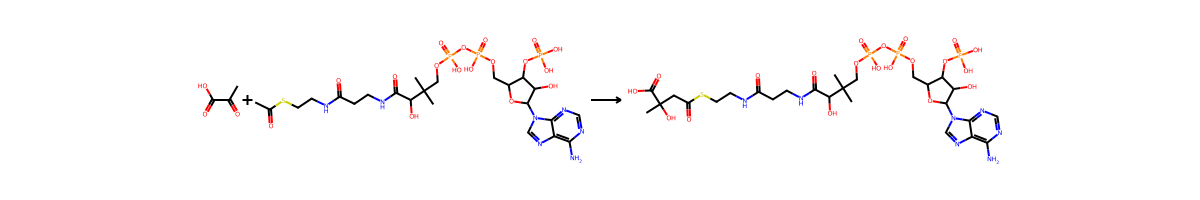

  Analogue: 3776592d10741da0b965d02c736db7a562d9785d, sim: 0.7349684238433838
shape: (15,)
Series: '' [str]
[
	"D4A5C3"
	"Q9I2A0"
	"O81027"
	"P35914"
	"Q8TB92"
	…
	"P38060"
	"P35915"
	"Q5R9E1"
	"Q8JZS7"
	"P97519"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:24406"
]


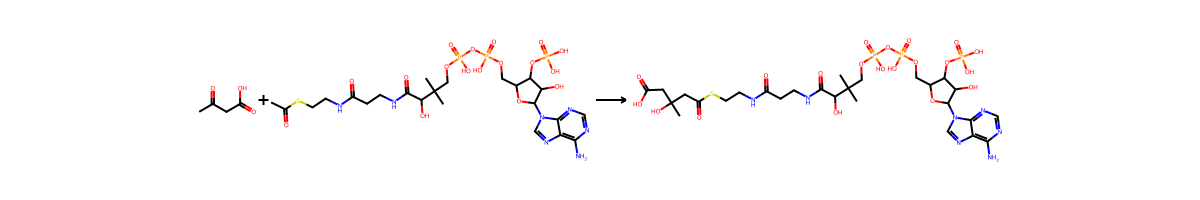

  Analogue: ac0194bfa4b4fef88fc9606e6fcbb67d4b9ff574, sim: 0.6482037305831909
shape: (0,)
Series: '' [str]
[
]
shape: (1,)
Series: '' [str]
[
	"RHEA:20814"
]


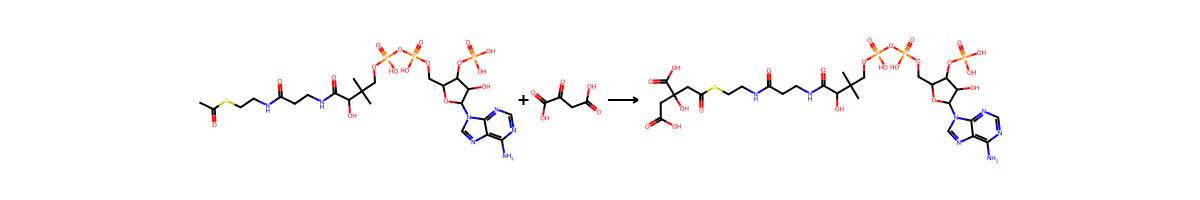

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reaction 2
  Analogue: 8c16137b4045f00069ba91d38a3b8b8ada3829c4, sim: 1.0
shape: (1,)
Series: '' [str]
[
	"A9WC41"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:38272"
]


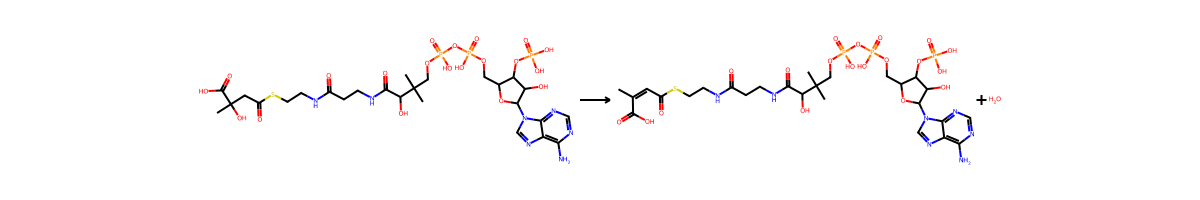

  Analogue: 32ca0b12f9f7ef92d247559fd0334f9927138765, sim: 0.583383321762085
shape: (9,)
Series: '' [str]
[
	"Q9JLZ3"
	"Q1ZXF1"
	"Q58DM8"
	"P14604"
	"Q13825"
	"Q8BH95"
	"F1LU71"
	"P30084"
	"Q5R646"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:31080"
]


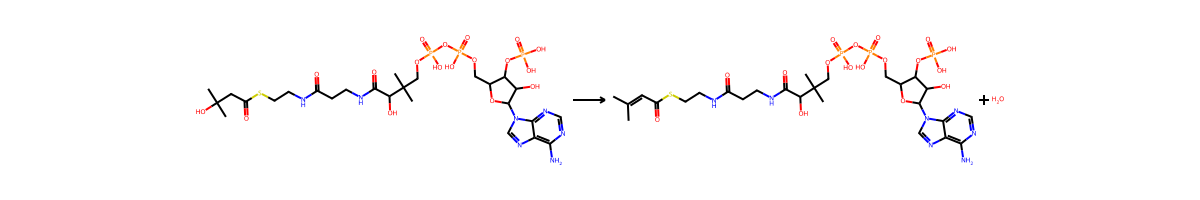

  Analogue: 0fb6d031135bc1397e4b21536d8d544d955d929d, sim: 0.3757345676422119
shape: (1,)
Series: '' [str]
[
	"P95619"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:54149"
]


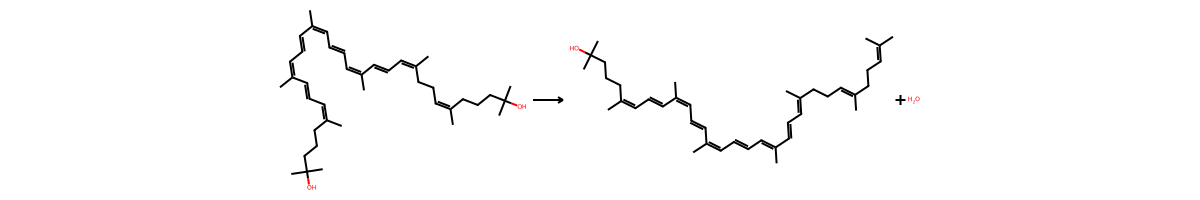

  Analogue: e69e950f1075d72c4fafeff3f73e87cf4afb03b7, sim: 0.3757345676422119
shape: (3,)
Series: '' [str]
[
	"P17058"
	"Q7X3G5"
	"P95619"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:31612"
]


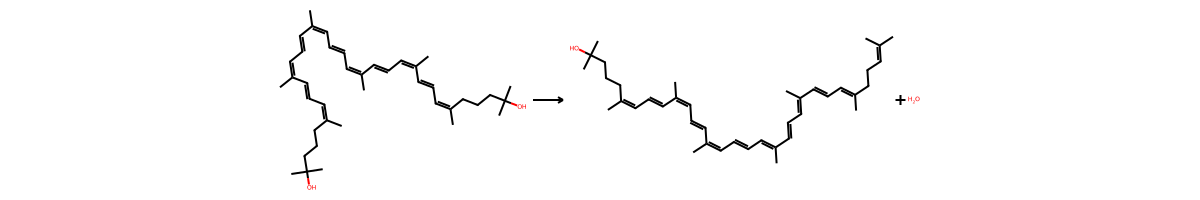

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reaction 3
  Analogue: d7eea5a1a938257639a2cbe5950fa3501a3fc821, sim: 0.772926926612854
shape: (4,)
Series: '' [str]
[
	"Q8VCH6"
	"Q5BQE6"
	"Q15392"
	"Q60HC5"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:36393"
]


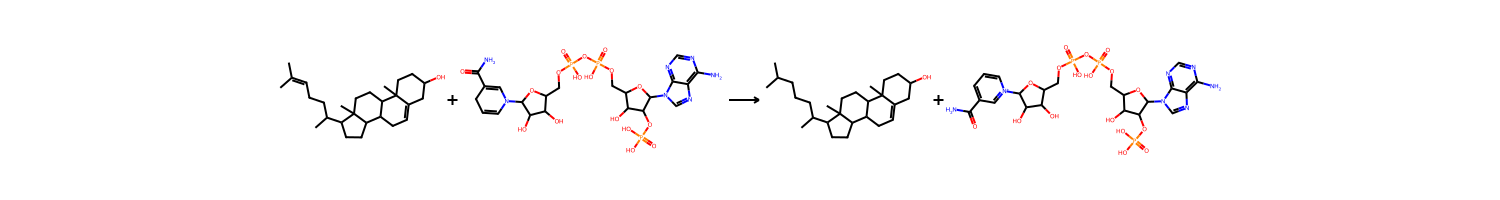

  Analogue: 4caf2f1b805886fcdc9cd4f35ec1930c649d04a1, sim: 0.772926926612854
shape: (2,)
Series: '' [str]
[
	"Q39085"
	"P93472"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:13687"
]


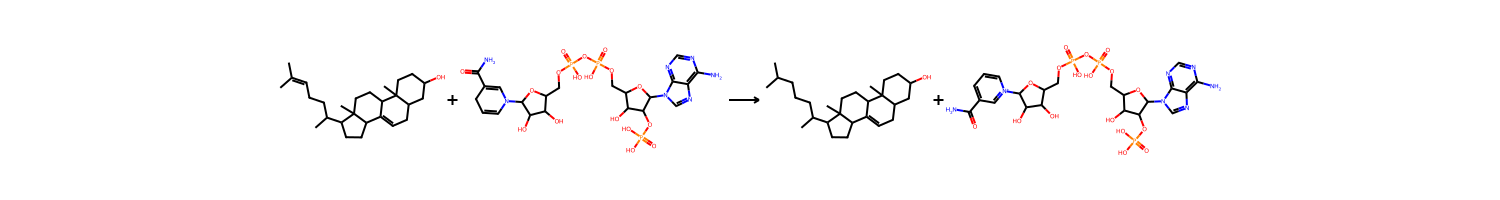

  Analogue: 51dd4e1a1f0147332112daff0b340d6f4e564a2d, sim: 0.772926926612854
shape: (0,)
Series: '' [str]
[
]
shape: (1,)
Series: '' [str]
[
	"RHEA:36397"
]


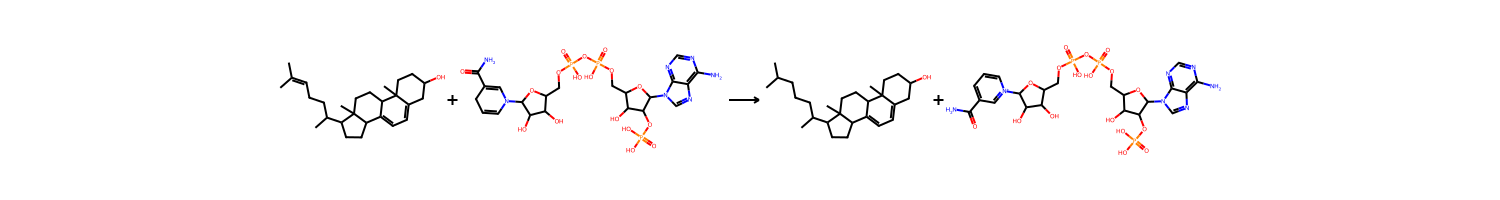

  Analogue: e3064cfb5bfe5b2849fee560ddf87ca9d79e188c, sim: 0.772926926612854
shape: (4,)
Series: '' [str]
[
	"Q8VCH6"
	"Q5BQE6"
	"Q15392"
	"Q60HC5"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:36401"
]


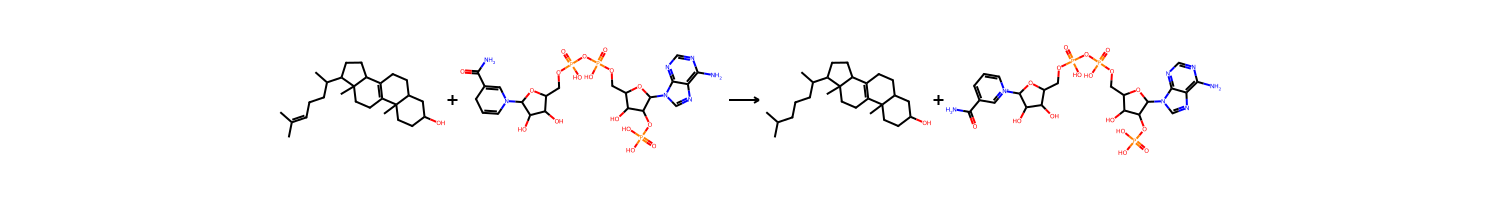

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reaction 4
  Analogue: b4c25c288c30a8a0c671f4f171296e4f6785c7ba, sim: 0.6880624890327454
shape: (2,)
Series: '' [str]
[
	"Q5KUG0"
	"Q1LRY0"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:52621"
]


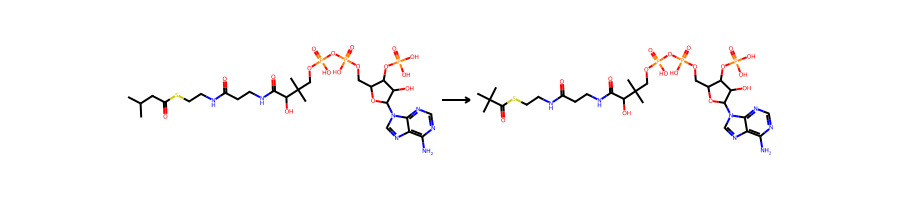

  Analogue: b4c25c288c30a8a0c671f4f171296e4f6785c7ba, sim: 0.6880624890327454
shape: (2,)
Series: '' [str]
[
	"Q5KUG0"
	"Q1LRY0"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:52621"
]


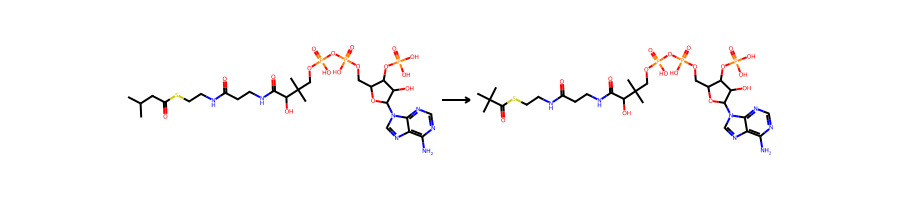

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reaction 5
  Analogue: b5b85390511c2adccb423c478bae3e0946ed96a8, sim: 0.8000442981719971
shape: (3,)
Series: '' [str]
[
	"Q0P5J1"
	"Q7TNT2"
	"Q96K12"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:81748"
]


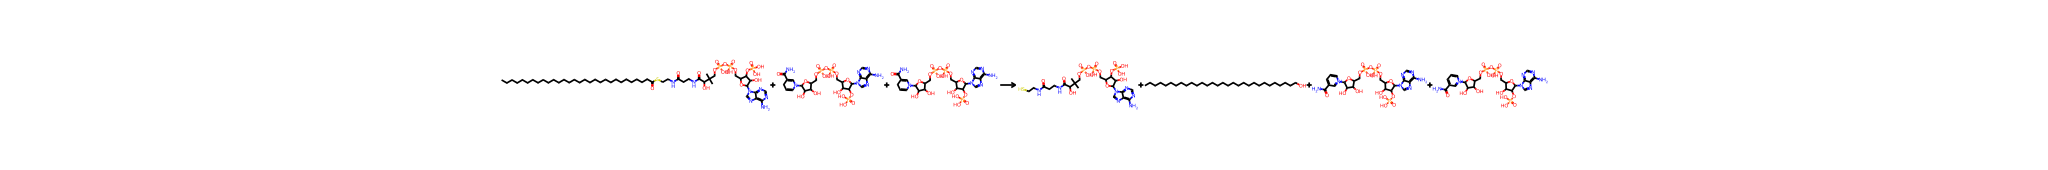

  Analogue: 6f65afa1f23d29265e513885c445b7fbde12a8e5, sim: 0.8000442981719971
shape: (3,)
Series: '' [str]
[
	"Q0P5J1"
	"Q7TNT2"
	"Q96K12"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:81732"
]


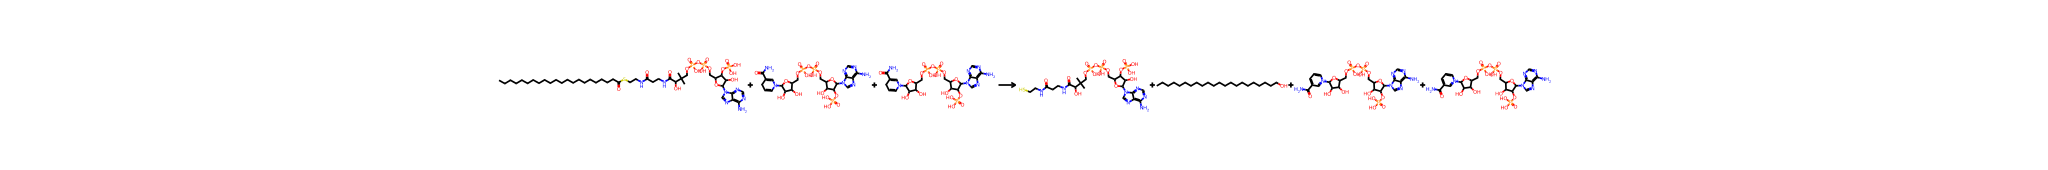

  Analogue: e28526a64f436e83d38207b68585369173b63e35, sim: 0.8000442981719971
shape: (2,)
Series: '' [str]
[
	"P13702"
	"O51628"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:14835"
]


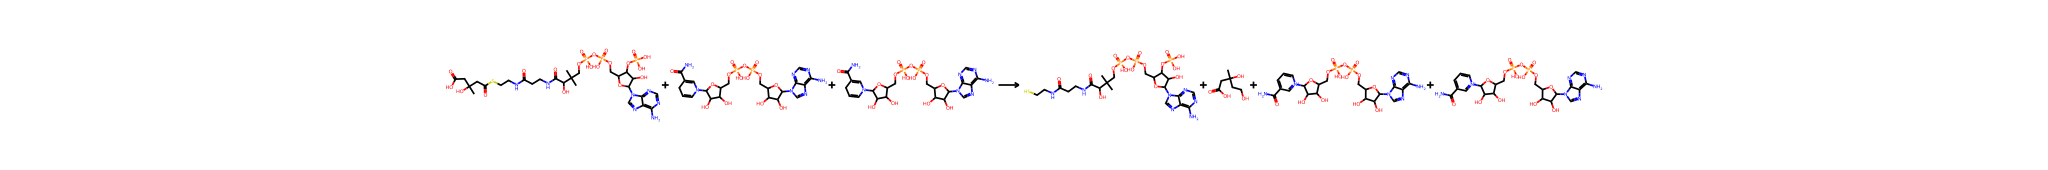

  Analogue: 3b03bb6fe1ba736314eea99b8acb8638cc56f597, sim: 0.8000442981719971
shape: (3,)
Series: '' [str]
[
	"Q0P5J1"
	"Q7TNT2"
	"Q96K12"
]
shape: (1,)
Series: '' [str]
[
	"RHEA:81780"
]


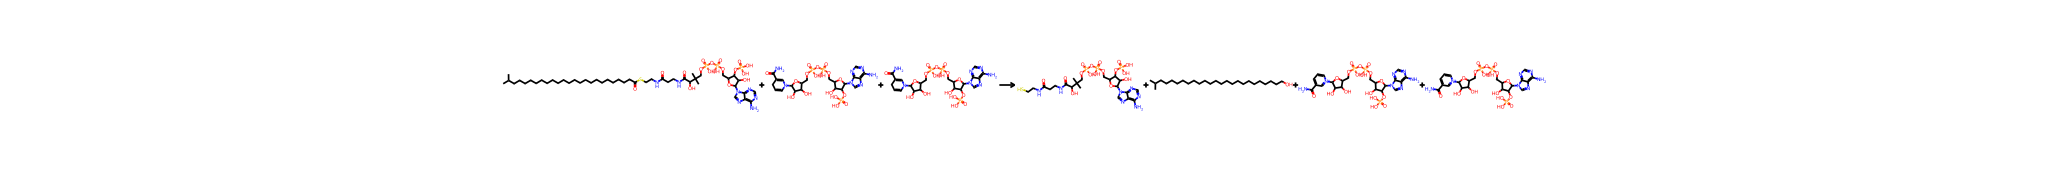

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [95]:
topk = 5
path = prs.filter(pl.col("id").is_in(rids)).sort(
    pl.col("id").replace({id: idx for idx, id in enumerate(rids)}),
).with_columns(
    pl.col("rxn_sims").list.max().alias("max_sim")
)
for i, row in enumerate(path.iter_rows(named=True)):
    print(f"Reaction {i+1}")

    k = 1
    for krid, sim in zip(row['analogue_ids'], row['rxn_sims']):
        analogue = krs.filter(pl.col("id") == krid)
        print(f"  Analogue: {krid}, sim: {sim}")
        print(f"{analogue[0, 'enzymes']}")
        print(f"{analogue[0, 'db_ids']}")
        display(
            SVG(
                draw_reaction(analogue[0, 'smarts'])
            )
        )
        k += 1
        if k >= topk:
            break
    print("-" * 200)

    

In [68]:
prs.filter(
    pl.col("id") == 'R6f90f338e2827cf5d6c14f49ac451ebf223eed98c98d70aa065860f67f9c49ab'
)

id,smarts,am_smarts,dxgb_label,rxn_sims,analogue_ids,rules
str,str,str,i32,list[f32],list[str],list[str]
"""R6f90f338e2827cf5d6c14f49ac451…","""NC(=O)C1=CN(C2OC(COP(=O)(O)OP(…","""[NH2:58][C:59](=[O:60])[C:61]1…",1,"[0.776524, 0.776524]","[""7fa14c20e24cde2f3097739e7be1e2d30ddda6ef"", ""7fa14c20e24cde2f3097739e7be1e2d30ddda6ef""]","[""mechinferred_dt_04_rules:6477""]"


In [69]:
rules = pl.read_csv(
    "/home/stef/bottle/artifacts/rules/mechinferred_dt_04_rules_w_coreactants.tsv",
    separator="\t",
)
rules.head()

Name,Reactants,SMARTS,Products
str,str,str,str
"""0_0""","""Any;WATER""","""[C&D2&v4&H0&+0&!R&z2:1]#[N&D1&…","""Any"""
"""1_0""","""Any;WATER""","""[C&D2&v4&H0&+0&!R&z2:1]#[N&D1&…","""Any"""
"""2_0""","""O2;Any;Any""","""[O&D1&v2&H0&+0&!R:1]=[O&D1&v2&…","""H2O2;Any"""
"""3_0""","""H2O2;Any""","""[O&D1&v2&H1&+0&!R:1]-[O&D1&v2&…","""O2;Any;Any"""
"""4_0""","""Any""","""([C&D3&v4&H0&+0&!R&z1:1](=[C&D…","""Any"""


In [70]:
templates = rules.filter(pl.col("Name").str.starts_with("6477_"))
templates

Name,Reactants,SMARTS,Products
str,str,str,str
"""6477_0""","""Any;NH3;Any""","""[C&D3&v4&H0&+0&!R&z2:1]-[C&D2&…","""Any;Any"""
"""6477_1""","""Any;NH3;NAD_CoF""","""[C&D3&v4&H0&+0&!R&z2:1]-[C&D2&…","""NADH_CoF;Any"""


In [48]:
for t in templates.iter_rows(named=True):
    print(t['Name'])
    lhs = t['SMARTS'].split('>>')[0]
    for mol_patt in lhs.split('.'):
        print(mol_patt)
   

55_0
[C&D3&v4&H0&+0&!R&z2:1](=[O&D1&v2&H0&+0&!R:2])-[O&D1&v2&H1&+0&!R:3]
[S&D2&v2&H0&+0&!R:4]-[C&D3&v4&H0&+0&!R&z2:5]=[O&D1&v2&H0&+0&!R:6]
55_1
[C&D3&v4&H0&+0&!R&z2:1](=[O&D1&v2&H0&+0&!R:2])-[O&D1&v2&H1&+0&!R:3]
[S&D2&v2&H0&+0&!R:4]-[C&D3&v4&H0&+0&!R&z2:5]=[O&D1&v2&H0&+0&!R:6]
55_2
[C&D3&v4&H0&+0&!R&z2:1](=[O&D1&v2&H0&+0&!R:2])-[O&D1&v2&H1&+0&!R:3]
[S&D2&v2&H0&+0&!R:4]-[C&D3&v4&H0&+0&!R&z2:5]=[O&D1&v2&H0&+0&!R:6]


In [49]:
rids = paths.filter(pl.col("id").str.starts_with(pid))["reactions"].to_list()[0]
path_rxns = []
path = prs.filter(pl.col("id").is_in(rids)).sort(
    pl.col("id").replace({id: idx for idx, id in enumerate(rids)}),
).with_columns(
    pl.col("rxn_sims").list.max().alias("max_sim")
)
for i, row in enumerate(path.iter_rows(named=True)):
    path_rxns.append(row['smarts'])

In [50]:
path_rxns

['NC(CCC(=O)O)C(=O)O>>CC(C(=O)O)C(N)C(=O)O',
 'CC(C(=O)O)C(N)C(=O)O.CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O>>CC(C(=O)O)C(N)C(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O.CC(=O)O',
 'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1.CC(C(=O)O)C(N)C(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O>>CC(CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(=O)O.N.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1',
 'CC(CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(=O)O>>CC(C)(C(=O)O)C(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O',
 'CC(C)(C(=O)O)C(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(

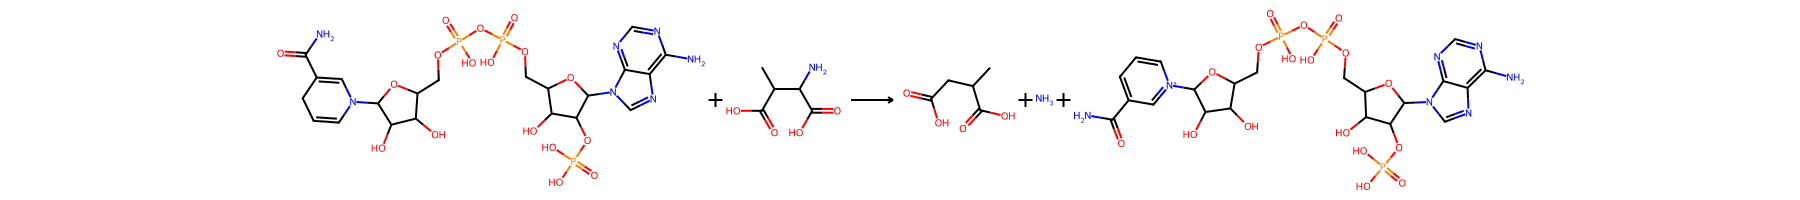

In [80]:
rxn_2_replace = 'NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1.CC(C(=O)O)C(N)C(=O)O>>CC(CC(=O)O)C(=O)O.N.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1'
display(
    SVG(
        draw_reaction(rxn_2_replace)
    )
)

with open('../artifacts/illustrative_imgs/coa_mutase/rxn_2_replace.svg', 'w') as f:
    f.write(draw_reaction(rxn_2_replace))

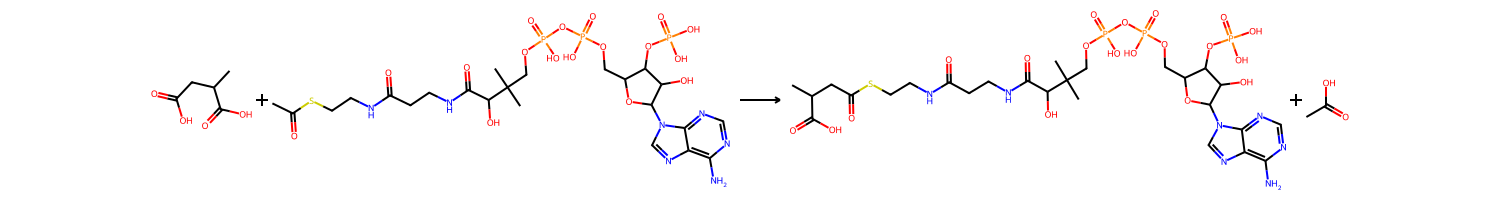

In [81]:
rxn_3_replace = 'CC(CC(=O)O)C(=O)O.CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O>>CC(C(=O)O)CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O.CC(=O)O'
display(
    SVG(
        draw_reaction(rxn_3_replace)
    )
)

with open('../artifacts/illustrative_imgs/coa_mutase/rxn_3_replace.svg', 'w') as f:
    f.write(draw_reaction(rxn_3_replace))

In [75]:
">>".join(templates[0]['SMARTS'][0].split('>>')[::-1])

'[C&D3&v4&H0&+0&R&z0:4]1=[C&D2&v4&H1&+0&R&z1:14]-[N&D3&v3&H0&+0&R:8](-[C&D3&v4&H1&+0&R&z2:9](-[O&D2&v2&H0&+0&R:10])-[C&D3&v4&H1&+0&R&z1:11](-[C&D3&v4&H1&+0&R&z1:12])-[O&D1&v2&H1&+0&!R:13])-[C&D2&v4&H1&+0&R&z1:7]=[C&D2&v4&H1&+0&R&z0:6]-[C&D2&v4&H2&+0&R&z0:5]-1.[N&D1&v3&H2&+0&!R:3]-[C&D3&v4&H1&+0&!R&z1:2]-[C&D3&v4&H0&+0&!R&z2:1]>>[C&D3&v4&H0&+0&!R&z2:1]-[C&D2&v4&H2&+0&!R&z0:2].[N&D0&v3&H3&+0&!R:3].[c&D3&v4&H0&+0&R&z0:4]1:[c&D2&v4&H1&+0&R&z0:5]:[c&D2&v4&H1&+0&R&z0:6]:[c&D2&v4&H1&+0&R&z1:7]:[n&D3&v4&H0&+&R:8](-[C&D3&v4&H1&+0&R&z2:9](-[O&D2&v2&H0&+0&R:10])-[C&D3&v4&H1&+0&R&z1:11](-[C&D3&v4&H1&+0&R&z1:12])-[O&D1&v2&H1&+0&!R:13]):[c&D2&v4&H1&+0&R&z1:14]:1'

In [76]:
dt_04_6477 = '[C&D3&v4&H0&+0&R&z0:4]1=[C&D2&v4&H1&+0&R&z1:14]-[N&D3&v3&H0&+0&R:8](-[C&D3&v4&H1&+0&R&z2:9](-[O&D2&v2&H0&+0&R:10])-[C&D3&v4&H1&+0&R&z1:11](-[C&D3&v4&H1&+0&R&z1:12])-[O&D1&v2&H1&+0&!R:13])-[C&D2&v4&H1&+0&R&z1:7]=[C&D2&v4&H1&+0&R&z0:6]-[C&D2&v4&H2&+0&R&z0:5]-1.[N&D1&v3&H2&+0&!R:3]-[C&D3&v4&H1&+0&!R&z1:2]-[C&D3&v4&H0&+0&!R&z2:1]>>[C&D3&v4&H0&+0&!R&z2:1]-[C&D2&v4&H2&+0&!R&z0:2].[N&D0&v3&H3&+0&!R:3].[c&D3&v4&H0&+0&R&z0:4]1:[c&D2&v4&H1&+0&R&z0:5]:[c&D2&v4&H1&+0&R&z0:6]:[c&D2&v4&H1&+0&R&z1:7]:[n&D3&v4&H0&+&R:8](-[C&D3&v4&H1&+0&R&z2:9](-[O&D2&v2&H0&+0&R:10])-[C&D3&v4&H1&+0&R&z1:11](-[C&D3&v4&H1&+0&R&z1:12])-[O&D1&v2&H1&+0&!R:13]):[c&D2&v4&H1&+0&R&z1:14]:1'
operator_map_reaction(rxn_2_replace, dt_04_6477)

OperatorMapResult(did_map=True, aligned_smarts='NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1.CC(C(=O)O)C(N)C(=O)O>>CC(CC(=O)O)C(=O)O.N.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1', atom_mapped_smarts='[NH2:23][C:22](=[O:24])[C:11]1=[CH:21][N:15]([CH:16]2[O:17][CH:25]([CH2:26][O:27][P:28](=[O:29])([OH:30])[O:31][P:32](=[O:33])([OH:34])[O:35][CH2:36][CH:37]3[O:38][CH:40]([n:43]4[cH:45][n:48][c:50]5[c:55]([NH2:57])[n:56][cH:54][n:49][c:46]54)[CH:41]([O:44][P:47](=[O:51])([OH:52])[OH:53])[CH:39]3[OH:42])[CH:19]([OH:58])[CH:18]2[OH:20])[CH:14]=[CH:13][CH2:12]1.[CH3:4][CH:3]([C:5](=[O:6])[OH:7])[CH:2]([NH2:10])[C:1](=[O:8])[OH:9]>>[CH3:4][CH:3]([CH2:2][C:1](=[O:8])[OH:9])[C:5](=[O:6])[OH:7].[NH3:10].[NH2:23][C:22](=[O:24])[c:11]1[cH:12][cH:13][cH:14][n+:15]([CH:16]2[O:17][CH:25]([CH2:26][O:27][P:28](=[O:29])([OH:30])[O:31][P:32](=[O:33])([OH:34])[O:35][CH2:36][CH:37]3[O:38][CH:40]([n:43]4[cH:45][n:4

In [67]:
dt_13_55 = '[C&D3&v4&H0&+0&!R&z2:1](=[O&D1&v2&H0&+0&!R:2])-[O&D1&v2&H1&+0&!R:3].[S&D2&v2&H0&+0&!R:4]-[C&D3&v4&H0&+0&!R&z2:5]=[O&D1&v2&H0&+0&!R:6]>>[C&D3&v4&H0&+0&!R&z2:1](=[O&D1&v2&H0&+0&!R:2])-[S&D2&v2&H0&+0&!R:4].[O&D1&v2&H0&+0&!R:6]=[C&D3&v4&H0&+0&!R&z2:5]-[O&D1&v2&H1&+0&!R:3]'
operator_map_reaction(rxn_3_replace, dt_13_55)

OperatorMapResult(did_map=True, aligned_smarts='CC(CC(=O)O)C(=O)O.CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O>>CC(CC(=O)SCCNC(=O)CCNC(=O)C(O)C(C)(C)COP(=O)(O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc32)C(O)C1OP(=O)(O)O)C(=O)O.CC(=O)O', atom_mapped_smarts='[CH3:6][CH:5]([CH2:4][C:1](=[O:2])[OH:59])[C:7](=[O:8])[OH:9].[CH3:60][C:58](=[O:57])[S:3][CH2:10][CH2:11][NH:12][C:13](=[O:14])[CH2:15][CH2:16][NH:17][C:18](=[O:19])[CH:20]([OH:21])[C:22]([CH3:23])([CH3:24])[CH2:25][O:26][P:27](=[O:28])([OH:29])[O:30][P:31](=[O:32])([OH:33])[O:34][CH2:35][CH:36]1[O:37][CH:39]([n:42]2[cH:45][n:50][c:52]3[c:54]([NH2:56])[n:55][cH:53][n:51][c:46]32)[CH:40]([OH:43])[CH:38]1[O:41][P:44](=[O:47])([OH:48])[OH:49]>>[CH3:6][CH:5]([CH2:4][C:1](=[O:2])[S:3][CH2:10][CH2:11][NH:12][C:13](=[O:14])[CH2:15][CH2:16][NH:17][C:18](=[O:19])[CH:20]([OH:21])[C:22]([CH3:23])([CH3:24])[CH2:25][O:26][P:27](=[O:28])([OH:29])[O:30][P:31](=[O:32])([OH:33])[O:34][CH2:35][CH:36]1[O:37][CH:39

In [83]:
acetate = 'CC(=O)O'
pyruvate = 'CC(=O)C(=O)O'
glutamate = 'C(CC(=O)O)C(N)C(=O)O'
hpa = "OCC(C)(C)C(O)=O"

with open('../artifacts/illustrative_imgs/coa_mutase/acetate.svg', 'w') as f:
    f.write(draw_molecule(acetate))
with open('../artifacts/illustrative_imgs/coa_mutase/pyruvate.svg', 'w') as f:
    f.write(draw_molecule(pyruvate))
with open('../artifacts/illustrative_imgs/coa_mutase/glutamate.svg', 'w') as f:
    f.write(draw_molecule(glutamate))
with open('../artifacts/illustrative_imgs/coa_mutase/hpa.svg', 'w') as f:
    f.write(draw_molecule(hpa))